In [ ]:
# installed "nltk" and "wordcloud"
!pip install nltk
!pip install wordcloud

In [22]:
#importing Numpy and pandas
import numpy as np
import pandas as pd


In [23]:
#extracting the twitter scraped data
data = pd.read_csv('twitter_data.csv')

In [24]:
#data understanding
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1467644946442166280,1467644946442166280,2021-12-05 18:59:57 Eastern Standard Time,2021-12-05,18:59:57,-500,1365539491272740865,cryptonutz2,Cryptonutz,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1467644936082411525,1465061950631690249,2021-12-05 18:59:54 Eastern Standard Time,2021-12-05,18:59:54,-500,91241156,skatygarcia,Tradonot - Skaty,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1467644930097041414,1467607964592877574,2021-12-05 18:59:53 Eastern Standard Time,2021-12-05,18:59:53,-500,3004726554,mexacoreoficial,Armando Sarabia | MEXACORE 🇲🇽,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'soynachoflores', 'name': 'Na...",NaN,NaN,NaN,NaN
3,1467644911759634434,1467644911759634434,2021-12-05 18:59:49 Eastern Standard Time,2021-12-05,18:59:49,-500,967859267352059911,iiicapital,3 Capital (🔑)³,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1467644875369709573,1466059426759016458,2021-12-05 18:59:40 Eastern Standard Time,2021-12-05,18:59:40,-500,1440339140273262593,yayattpkg,Yayattpkg,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'InuMetavast', 'name': 'Metav...",NaN,NaN,NaN,NaN


In [25]:
#data types
data.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [26]:
#data columns
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [27]:
#data shape, rows and columns
data.shape

(41035, 36)

In [28]:
#droping the unwanted columns 
data = data.drop(columns=[ 'conversation_id', 'created_at', 'time', 'timezone',
       'user_id', 'name', 'place', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'])

In [29]:
#Checking new data
data

,id,date,username,tweet
0,1467644946442166280,2021-12-05,cryptonutz2,OccamorOccam found #bitcoin in a User vault at...
1,1467644936082411525,2021-12-05,skatygarcia,#iris $iris #bitcoin $btc https://t.co/AeULfT...
2,1467644930097041414,2021-12-05,mexacoreoficial,@soynachoflores Para todo lo demás existe #Bit...
3,1467644911759634434,2021-12-05,iiicapital,What’s next for #Bitcoin?
4,1467644875369709573,2021-12-05,yayattpkg,@InuMetavast Very interesting project with spe...
...,...,...,...,...
41030,1470115476101603337,2021-12-12,cmobitcoin,The latest #bitcoin block 713874 with 2245 tra...
41031,1470115458330152962,2021-12-12,hoodbitcoin,I’m DJing A pop Up Shop At 12pm Come Spend or ...
41032,1470115457449574411,2021-12-12,bitcoin_korea,#Bitcoin's network hashrate has reached an all...
41033,1470115455222181888,2021-12-12,crypto_life4,Full thanks to @Tradecrypto11 as they have ana...


In [30]:
#finding if there is null values or not
data.isna().sum()

id          0
date        0
username    0
tweet       0
dtype: int64

In [31]:
#Using nltk to analyse the tweets positive, negative or neutral

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

import re
import nltk
nltk.download('words')

words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [32]:
#checking 0th tweets ratio 
sentence = data['tweet'][0]
sid.polarity_scores(sentence)['compound']
#its above 0.0, so its clearly positive

0.8264

In [33]:
#cleaning few things from tweet
def cleaner(tweet):
    # Removing tags
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) 
    #removing links 
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) 
    #joining tweets
    tweet = " ".join(tweet.split())
    #replacing it will null spaces
    tweet = tweet.replace("#", "").replace("_", " ") 
    
    #converting everything to lowercase
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet

data['cleaned_tweet'] = data['tweet'].apply(cleaner)


In [35]:

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

list1 = []
for i in data['cleaned_tweet']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
# adding a column to define its sentiment category

data['sentiment'] = pd.Series(list1)
def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)
data['sentiment_category'] = data['sentiment'].apply(sentiment_category)

In [37]:
data = data[['tweet', 'date', 'id', 'sentiment','sentiment_category']]
data.head(100)


,tweet,date,id,sentiment,sentiment_category
0,OccamorOccam found #bitcoin in a User vault at...,2021-12-05,1467644946442166280,0.7835,positive
1,#iris $iris #bitcoin $btc https://t.co/AeULfT...,2021-12-05,1467644936082411525,0.0000,neutral
2,@soynachoflores Para todo lo demás existe #Bit...,2021-12-05,1467644930097041414,0.0000,neutral
3,What’s next for #Bitcoin?,2021-12-05,1467644911759634434,0.0000,neutral
4,@InuMetavast Very interesting project with spe...,2021-12-05,1467644875369709573,0.9080,positive
...,...,...,...,...,...
95,@GoingParabolic Dead to who? 🤔 #bitcoin #bitco...,2021-12-13,1470543089760718849,-0.6486,negative
96,#surprise #tumblr #twitter #facebook #instagra...,2021-12-13,1470543081971892227,0.6124,positive
97,#surprise #bitcoin #tumblr #twitter #facebook ...,2021-12-13,1470543080076062725,0.6124,positive
98,#surprise #blogger #tumblr #twitter #facebook ...,2021-12-13,1470543080059281412,0.2732,positive


<AxesSubplot:>

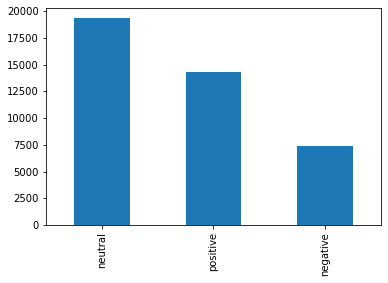

In [55]:
# Bar graph representing the sentimental category of tweets 

import seaborn as sns
data['sentiment_category'].value_counts().plot(kind = 'bar')

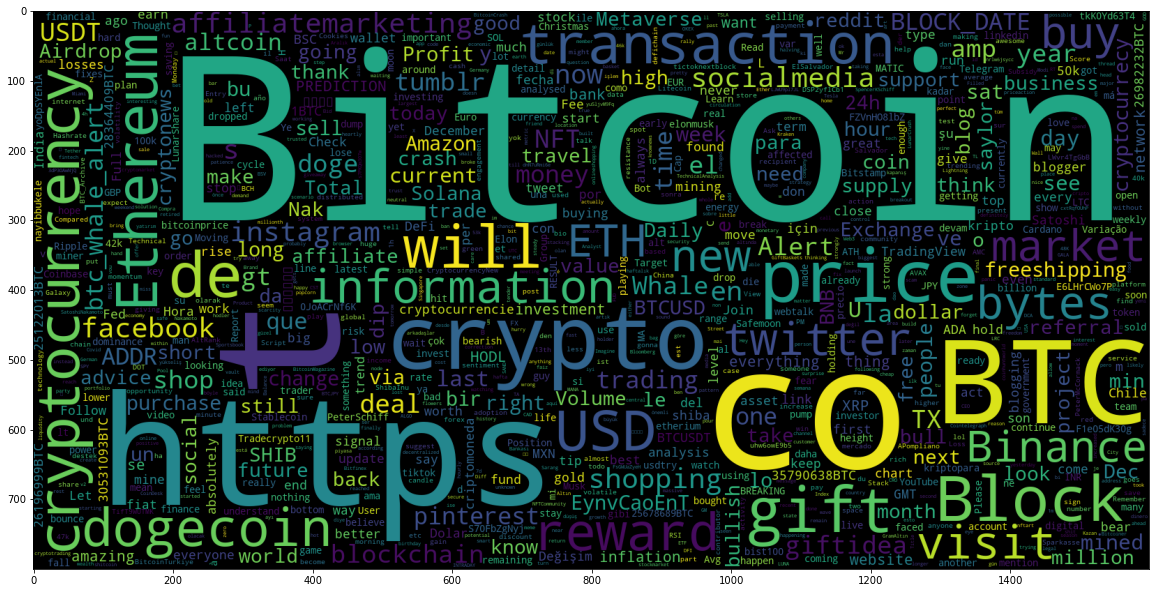

In [64]:
#visual wordcloud of tweets
data_cloud = data['tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_cloud))
plt.imshow(wc)

NameError: name 'pyLDAvis' is not defined